# Lecture XI: N-Body problem in Cosmology

This lecture is introducing the N-Body problem with a veri simple initial condition set and a somehow sophysticated integration method: the leap-frog.

Better and faster methods exists but they are outside the scope of this course.

## Introduction to the problem

The N-Body codes originated to study the evolution of many-particle self gravitating systems as globular clusters but also, in the cosmological framework the Dark Matter (DM).

Dark matter is an important component of the Universe. All observational evidence indicates that it dominates dynamics of galaxies, galaxy clusters, the formation of pancakes, voids, filaments of the large scale structures.

The dark matter is likely made of particles that other than the gravity force do not couple with the other matter.

The first (somewhat) realistic N-body simulation – collapse of a cloud of 300 self-interacting particles – was done by P.J.E. Peebles Peebles (1970).

With the development of computer hardware and new numerical algorithms N-body simulations became more realistic. 

Development of numerical methods was crucial for advances in N-body simulations. At the beginning direct summation technique was used to run the simulations (Peebles 1970; White 1976; Aarseth et al. 1979).

The number of operations in the direct summation method scales as $\propto N^2$ , where $N$ is the number of particles.

A simulation with $N = 10^5 -- 10^6$ paticles, is relatively fast (from few hours to few days). Such simulations can be very useful for testing different ideas and for small runs.

**Particle-Mesh** method (Klypin & Shandarin 1983; Hockney & Eastwood 1988; Klypin & Holtzman 1997) was a big step forward with cpu scaling ~ N. However, it requires a large 3D mesh for computation of the gravitational potential.

In cosmological N-body simulations we assume that all the mass – dark matter and baryons – is in particles and each particle represents both dark matter and baryons with the ratio of the two being equal to the cosmological average ratio.

## Simple N-Body Equations


We start discussion of numerical techniques with a very simple case: forces are estimated by summing up all contributions from all particles and with every particle moving
with the same time-step. The computational cost is dominated by the force calculations that scale as $N^2$, where $N$ is the number of particles in the simulation.

The problem that we try to solve numerically is the following. For given coordinates $\mathbf{r}_{init}$ and velocities $\mathbf{v}_{init}$ of $N$ massive particles at moment $t = t_{init}$ find their velocities $\mathbf{v}$ and coordinates $\mathbf{r}$ at the next moment $t = t_{next}$ assuming that the particles interact only through the Newtonian force of gravity. If $\mathbf{r}_i$ and $m_i$ are the coordinates and masses of the particles, then the equations of motion are:

<div>
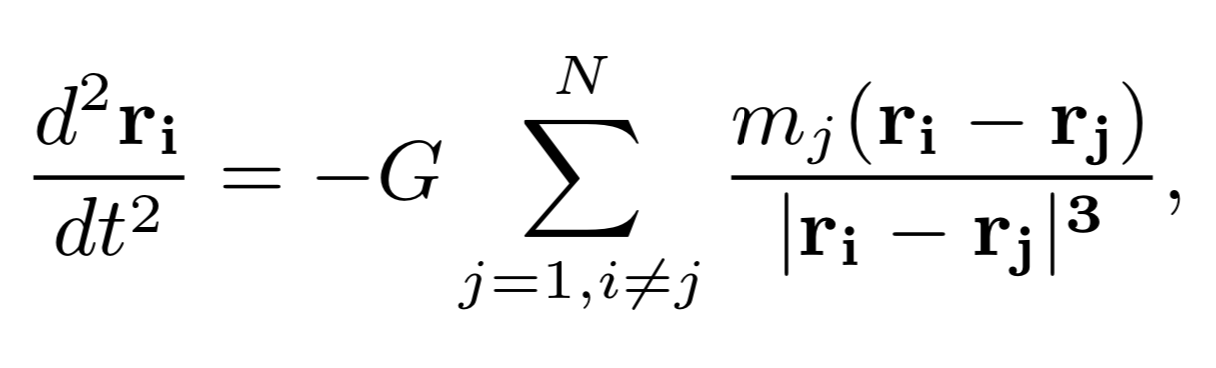
</div>

where $G$ is the gravitational constant (eq 1).

Now to make the integration we need to:

-  introduce force softening;
-  rescale variables;

### Force softening

we make the force weaker (“softer”) at small distances to **avoid very large accelerations**, 
when two particles collide or come very close to each other. 
This makes numerical integration schemes stable. 
Another reason for softening the force at small distances is that in cosmological environments, when one deals with galaxies, clusters of galaxies, or the large-scale structure, **effects of close collisions between individual particles are very small** and can be neglected. In other words, the force acting on a particle is dominated by the cumulative contribution of all particles, not by a few close individual companions.

We use the Plummer softening. It replaces the distance between particles 

$$\Delta r_{ij} = |r_i - r_j|$$

with

$$(\Delta r^2_{ij} +\epsilon^2)^{1/2}$$

where $\epsilon$ is the softening parameter.

### Rescale the variables

We need to introduce new variables to avoid dealing with too large or too small physical units of a real problem (we are in the Universe after all!!).

Suppose $M$ and $R$ are scales of mass and distances. These can be defined by a particular physical problem. For example, for simulations of an isolated galaxy M and R can be the total mass and the initial radius. 

The scale of time t0 is chosen as 
 
$$ t_0 = \bigg(\frac{GM}{R^3}\bigg)^{-1/2}.$$ 

Using M, R, and t0 we can change the physical variables $\mathbf{r}_i$ , $\mathbf{v}_i$ , $m_i$ into dimensionless variables using the following relations:


<div>
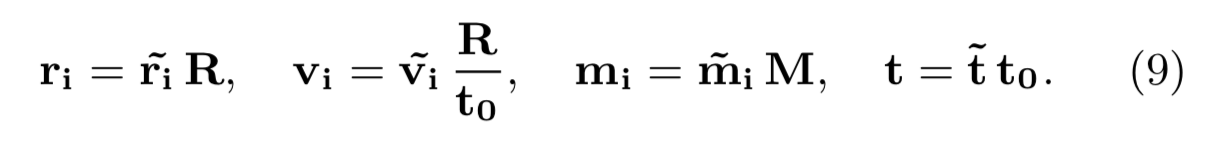
</div>

We now change the variables in eq (8) and use the Plummer softening:
<div>
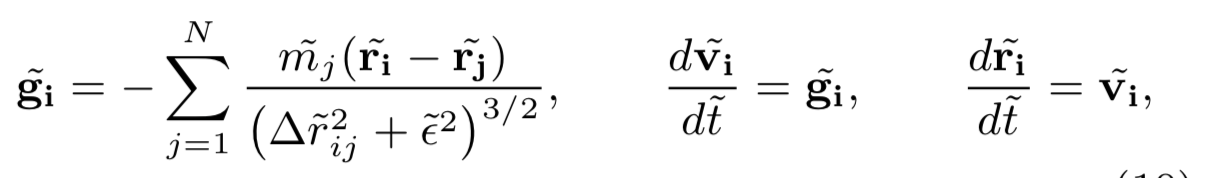
</div>

where $\mathbf{\tilde{g}}_i$ is the the dimensionless gravitational acceleration.

All numerical algorithms for solving these equations include three steps, which are repeated many times:

* find acceleration
* update velocity
* update coordinates


here is the example of the pseudo-code:

```
BEGIN MAIN
NUMBER dt, v, g, t,dt,T_Final
STRUCTURE Particle
ARRAY Particles OF Particle
INPUT T_Final

FOR time = 0 TO T_final STEP dt DO
    g = Acceleration(Particles)
    v = v+g*dt
    x = x+v*dt
    t = t+dt
ENDFOR
END MAIN

FUNCTION acceleration
NUMBERS i, j, D
FOR i = 0 TO Number_of_particles
  FOR j = 0 TO Number_of_particles
      IF i != j
        D = SQTR(SUM(X(j)-X(i)**2 + eps**2));
             g(i) = g (i) + m(j) * ((x(j)-x(i)));
      ENDIF
  ENDFOR
ENDFOR
RETURN g
END FUNCTION
```

The algoritm scale as $N^2$ but thare are some triks to make it faster.  Particles can be assigned into groups according to their accelerations with each group having their own time step. In this case particles with large accelerations update their coordinates and accelerations more often while particles in low density (and acceleration) regions move with large time step, thus reducing the cost of their treatment. 

Calculations of the acceleration can be easily parallelized **using OpenMP** directives. These optimizations can speed up the code by hundreds of times making it a useful tool for simple simulations.


```
BEGIN MAIN
NUMBER dt, v, g, t,dt,T_Final
STRUCTURE Particle
ARRAY Particles OF Particle
INPUT T_Final

FOR time = 0 TO T_final STEP dt DO
    g = Acceleration(Particles)
    v = v+g*dt
    x = x+v*dt
    t = t+dt
ENDFOR
END MAIN

FUNCTION acceleration
NUMBERS i, j, D

OPENMP Parallel for
FOR i = 0 TO Number_of_particles
  FOR j = 0 TO Number_of_particles
      IF i != j
        D = SQTR(SUM(X(j)-X(i)**2 + eps**2));
             g(i) = g (i) + m(j) * ((x(j)-x(i)));
      ENDIF
  ENDFOR
ENDFOR
END OPENMP 
RETURN g
END FUNCTION
}
```

### Data Structures

In the previous Pseudo-code we define a structure that describes the  particle property:

```
STRUCTURE particle
    ID
    position
    velocity
    acceleration
    mass
    integration time step \* this is constant for us *\
END STRUCTURE
```

Remember that we are in a 3D space! 

## Initial conditions

In this lab we consider a very simple Initial condition. 
A sphere of homegeneously distributed particles with mass 
$M = 10^{12}M_\sun$ and intial radius $R = 500 Kpc$. We assume as initial 
approximation $N=1000$ particles.

**Exercise:** calculate the normalization parameters for the equation of motion and the value of $G$ (gravitational constant).

**Exercise:** create the function that generate the initial condition to use in the N-Body code.

In case of DM halos, the particle distribution is not homegeneous but it fallows a density profile.  The density profile is usually fitted by the  NFW formula:



where $r_{s}$ is a scale radius, $\delta _{c}$ is a characteristic (dimensionless) density, and $\rho _{crit} = 3H^{2}/8\pi G${ is the critical density for closure.

A simple yet realistic case of the particle motion in a spherical system with density $\rho \propto r^{-2}$ and gravitational potential $ \phi = ln(r)$. This is a good approximation for the density of dark matter halos with the NFW profile around the characteristic “core” radius. 

Duration of integration is motivated by how many orbits a star or a dark matter particle orbiting the center of the halo  makes over the age of the Universe. 

It takes the Sun $\approx3 × 10^8$ yrs to make one period. Thus, we get a total of $\approx 30$ periods of rotation. Assuming a flat rotation curve, a star with radius of $1 kpc$ will make **300 orbits** over the age of the Universe. 


**Exercise:** given the size and the mass of the halo and the number of particles how many integration iteration you can assume? how big can be the time stamp.

## Moving Particles

Numerical integration of equations of motion are relatively simple as compared with the other part of the N-body problem – the force calculations.

To make arguments more transparent, we write equations of motion in proper coordinates and assume that the gravitational acceleration can be estimated for every particle. 

$$\frac{d\mathbf{v}(t)}{dt} = \mathbf{g}(t)$$

$$\frac{d\mathbf{x}(t)}{dt} = \mathbf{v}(t)$$

Along particle trajectory acceleration can be considered as a function of time $\mathbf{g(x}(t))$.

<div>
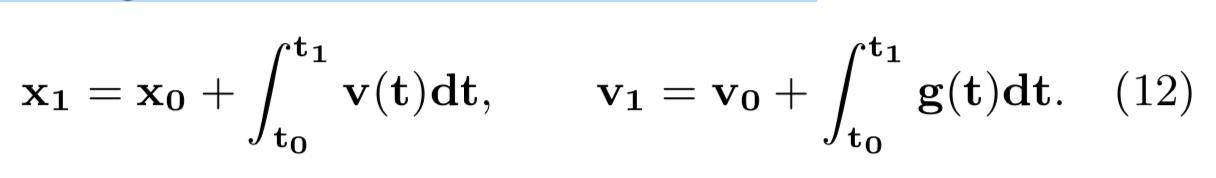
</div>

The first order Euler approximation for this  problem is  obtained by expanding  first order Taylor series around $t_0$  of  $\mathbf{v}(t)$ and $\mathbf{g}(t)$ and substituting those into previous equation. We keep only the first two terms, we get:

$$ \mathbf{x}_1 = \mathbf{x}_0 + \mathbf{v}_0 dt + \epsilon$$

where $\epsilon \approx g_0 dt^2/2$ so $\epsilon \propto O(dt^2)$ and 

$$ \mathbf{v}_1 = \mathbf{v}_0 + \mathbf{g}_0 dt + \epsilon$$

This approximation is not particularly accurate.

### The Leap-frog

We may dramatically improve the accuracy of Euler approximation by re-arranging terms in the Taylor expansion in order to kill some high order terms.

Suppose initial velocity is given not at the moment $t_0$, but a half timestep earlier at 

$t_{-1/2} = t_0 - \frac{dt}{2}$. 

Using coordinates at $t_0$ we find acceleration $\mathbf{g}_0(t_0)$. We now advance velocity one step forward from $t_{-1/2}$ to 

$t_{1/2} = t_{-1/2} + dt.$ 

Note that when we do it, we use acceleration at the middle of the time step. 

We then advance coordinates to moment $t_1 = t_0 + dt$ using the new value of velocity. 

As the result, the scheme of integration is:

$$\mathbf{v_{1/2}} = \mathbf{v_{-1/2}} + \mathbf{g_0} dt$$ 

$$\mathbf{x_1} = \mathbf{x_0} + \mathbf{v_{1/2}} dt.$$

The error of this approximation is

$$ \epsilon = \frac{1}{12} \frac{d^2 g}{dt^2}dt^4 $$

so the error is is proportional to $dt^4$. 

This  integrator is called the leap-frog because velocities are “jumping over” coordinates and then coordinates are “jumping over” velocities

<div>
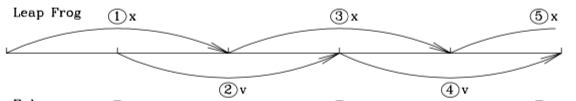
</div>




An algorithm of integration of trajectories can be written as a sequence of operators: 

* an operator that advance particle positions (called drifts) $D(dt)$
* an operator that change velocities (called kicks) $K(dt)$.

In practice

$$ K(dt) : \mathbf{v} = \mathbf{v} + \mathbf{g} dt $$

and 

$$ D(dt) : x = x + vdt $$

If we introduce other two operators:

* the evaluation of the gravitational acceleration: $G$
* the update of the time-step: $S$

Then we also need to specify the moment when the gravitational acceleration is calculated and the moment when the decision is made to change the time-step.

A simple constant-step leap-frog integrator can be written as sequence of 

$$GK(dt)D(dt)GK(dt)D(dt)....$$

In a pseudo code implementation this results in:

```
BEGIN MAIN
NUMBER dt, v_05, g0, t,dt,T_Final,m 
STRUCTURE Particle
ARRAY Particles OF Particle
INPUT T_Final

FOR time = 0 TO T_final STEP dt DO
    g0 = Acceleration(x, m, t)
    v_05 = v_05 + g0*dt
    x = x + v_05*dt
    t = t + dt
ENDFOR
END MAIN

FUNCTION acceleration
NUMBERS i, j, D
FOR i = 0 TO Number_of_particles
  FOR j = 0 TO Number_of_particles
      IF i != j
        D = SQTR(SUM(X(j)-X(i)**2 + eps**2));
             g(i) = g (i) + m(j) * ((x(j)-x(i)));
      ENDIF
  ENDFOR
ENDFOR
RETURN g
END FUNCTION
```

The leap-frog integrator has two more properties:
* It is time reversible;
* it is symplectic (preserve the Hamiltonian structure);

One disadvantage of the leap-frog is that velocities and coordinates are defined at different moments of time.


### Kick-Drift-Kick

<div>
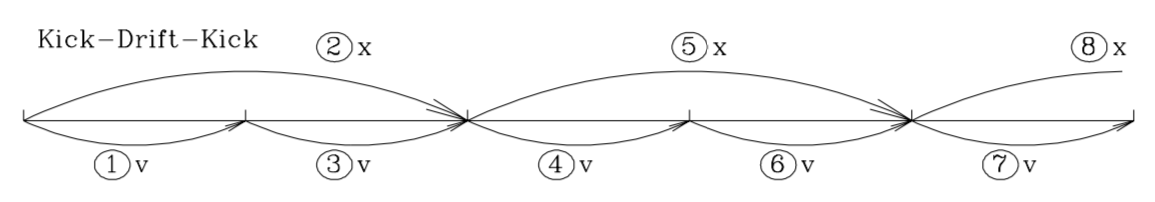
</div>


We can also write the leap-frog integrator which starts with $\mathbf{x}$ and $\mathbf{v}$ defined at the same moment of time $t$ and ends at $t + dt$ moment:

$$ K(dt/2)D(dt)GK(dt/2)S $$

This integator is called KDK and it is show in the figure above.
In this integrator first we calculate the velocity displacement then the position displacement, new accelerations are estimated after advancing coordinates, and the change in the time-step $dt$ (when necessary) is made at the end of each time-step.

Changing the time-step may be necessary when particles experience a vast range of accelerations, which is typically the case in high-resolution cosmological simulations. 

However, changing the time-step results in breaking symmetries and reducing the accuracy of the leap-frog integrator. It becomes not time reversible and it loses its ability to preserve the energy. There are some ways to restore these properties, but they are complicated and never used in cosmology.

As the result, the scheme of integration is:

$$\mathbf{v_{1/2}} = \mathbf{v_{0}} + \mathbf{g_0} dt/2$$ 

$$\mathbf{x_1} = \mathbf{x_0} + \mathbf{v_{1/2}} dt $$

$$\mathbf{v_{1}} = \mathbf{v_{1/2}} + \mathbf{g_1} dt/2$$

As a pseudo code


```
BEGIN MAIN
NUMBER dt, v_05, g0, t,dt,T_Final
STRUCTURE Particle
ARRAY Particles OF Particle
INPUT T_Final

FOR time = 0 TO T_final STEP dt DO
    v_05 = v + g * dt/2
    x = x + v_05*dt
    g = Acceleration(x, m, t)
    v = v_05 + g * dt/2
    t = t + dt
ENDFOR
END MAIN

FUNCTION acceleration
NUMBERS i, j, D
FOR i = 0 TO Number_of_particles
  FOR j = 0 TO Number_of_particles
      IF i != j
        D = SQTR(SUM(X(j)-X(i)**2 + eps**2));
             g(i) = g (i) + m(j) * ((x(j)-x(i)));
      ENDIF
  ENDFOR
ENDFOR
RETURN g
END FUNCTION
```

**Exercise:** Given the uniform shperical distribution of particles of mass $m$, integrate the equation of motion with time using KDK method ($\epsilon = 0.017$). 

**Exercise:** Estimate the Energy and Angularm momentum conservation.

**Exercise:** Compare the results with the Euler approximation.

## short discussion on softening

As discussed above, in practice, one softens the forces at small interbody separations $r = | x' - x |$, which is equivalent to replacing the bodies by some extended mass distribution.

What is the role of softening?

* softening does not much reduce the (artificial) two-body relaxation. In an N-body simulation the mass distribution is discretised into a series of softened point particles. This solution can be exact for a star cluster where each particle represents a single star, but for cosmological simulations of the dark matter each particle can be  times larger than the GeV mass candidates being simulated. In this approach the particles represent a coarse grained sampling of phase space which sets a mass and spatial resolution. Unfortunately these super-massive particles will undergo two body encounters that lead to energy transfer as the system tends towards equipartition. In the real Universe the dark matter particles are essentially collisionless and pass unperturbed past each other. Two-body relaxation is driven by close as well as distant encounters: each octave in distance is contributing equally. By softening the forces at small r, one reduces the contributions from close encounters. Most of the relaxation, however, is due to noise on larger scales.
* softening avoids artificial two-body encounters:  without softening, the accurate numerical integration of close encounters and binaries, the main obstacle in collisional N-body codes, requires great care and substantial amounts of computer time. However, as already mentioned, the bodies are just a representation of the one-particle, and consequently binaries as well as two-body encounters (and the Newtonian forces arising in them) are entirely artificial. 
* As a benefit of softening, close encounters between bodies are much less of a problem and so a leap-frog method can be used with a great save in computing time.

Softening is a complex function. The Softening lenght depends on the number of particles, deinsity profile in a case of the a uniform spere ew can assume $\epsilon \approx 0.01$ or better  $\epsilon \approx 0.017 {N/10^5}^{-0.23} $, as largely discussed by Dehnen 2001.

**Excercise:** Study the behaviour of the N-Body code variyng the softening lenght.
